<a href="https://colab.research.google.com/github/RicardoLelis/ML-DS-Code/blob/main/logistic_regression_1d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0 0.6931471
1 0.655162
2 0.6208158
3 0.58973545
4 0.56157345
5 0.5360119
6 0.51276356
7 0.49157166
8 0.47220805
9 0.45447123
10 0.4381838
11 0.42318976
12 0.4093523
13 0.3965511
14 0.3846806
15 0.37364793
16 0.36337122
17 0.3537784
18 0.34480557
19 0.33639625
20 0.32850015
21 0.32107288
22 0.3140744
23 0.3074692
24 0.30122536
25 0.29531434
26 0.28971025
27 0.28439
28 0.2793325
29 0.27451876
30 0.26993152
31 0.26555505
32 0.2613752
33 0.25737873
34 0.2535538
35 0.2498895
36 0.24637577
37 0.24300338
38 0.2397639
39 0.23664945
40 0.23365286
41 0.2307674
42 0.2279869
43 0.22530566
44 0.22271833
45 0.22021997
46 0.2178059
47 0.21547194
48 0.21321401
49 0.21102837
50 0.20891152
51 0.20686023
52 0.20487134
53 0.20294201
54 0.20106956
55 0.1992514
56 0.19748516
57 0.19576861
58 0.19409959
59 0.1924761
60 0.19089624
61 0.18935825
62 0.18786041
63 0.18640113
64 0.18497892
65 0.18359226
66 0.18223989
67 0.18092045
68 0.17963274
69 0.1783756
70 0.17714792
71 0.17594858
72 0.17477667
73 0.17363118


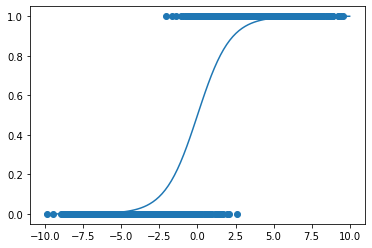

In [9]:
import numpy as np
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

import matplotlib.pyplot as plt

learning_rate = 0.01
training_epochs = 1000

def sigmoid(x):
  return 1. / (1. + np.exp(-x))

x1 = np.random.normal(-4, 2, 1000)
x2 = np.random.normal(4, 2, 1000)

xs = np.append(x1, x2)
ys = np.asarray([0.] * len(x1) + [1.] * len(x2))

plt.scatter(xs, ys)

X = tf.compat.v1.placeholder(tf.float32, shape=(None,), name="x")
Y = tf.compat.v1.placeholder(tf.float32, shape=(None,), name="y")

w = tf.Variable([0., 0.], name="parameter", trainable=True)

y_model = tf.sigmoid(w[1] * X + w[0])
cost = tf.reduce_mean(-Y * tf.compat.v1.log(y_model) - (1 - Y) * tf.compat.v1.log(1 - y_model))

train_op = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)

with tf.compat.v1.Session() as sess:
  sess.run(tf.compat.v1.global_variables_initializer())
  prev_err = 0
  for epoch in range(training_epochs):
    err, _ = sess.run([cost, train_op], {X:xs, Y:ys})
    print(epoch, err)
    if abs(prev_err - err) < 0.0001:
      break
    prev_err = err
  w_val = sess.run(w, {X:xs, Y:ys})
  all_xs = np.linspace(-10, 10, 100)
  plt.plot(all_xs, sigmoid((all_xs * w_val[1] + w_val[0])))
